In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv', index_col=0)

- Accounts payable / sales **(can we use an equivalent as revenue?)
- Change in AR / turnover  **(What is turnover)
- Financial charges / sales **(cost of obtaining loan
- Net Income + Depreciation / (liabilities - Cash)
- Sales growth **(if we have yoy data)
- Cash Flow / Financial Charges **(Financial Charges same as COGS)
- Equity / Assets (*)
- Changes in ROA (if YoY)
- Total Assets (*)
- Cash / Assets (*)
- EBITDA / Sales (Sales?? equivalent to revenue)
- ~~Investments~~ / COGS (cost of goods sold) ()
- Net Income Growth (YoY)
- Net Income / Assets
- Quick Ratio?? == (current assests  - inventory / current liabilities) 
- RE / Assets 


In [3]:
# Total equity for entire group ("family")


# do we have related firms? Under same structure or mutual investors or parent?

In [4]:
# df.isna().sum()

In [7]:
df.shape

(1023552, 43)

In [9]:
# df

In [5]:
df['def_date'].value_counts(dropna=False)

def_date
NaT           968128
19/12/2013       303
20/12/2013       294
20/12/2012       288
28/12/2012       248
               ...  
02/07/2008         1
20/06/2009         1
28/02/2009         1
04/01/2008         1
03/01/2013         1
Name: count, Length: 1639, dtype: int64

In [6]:
df['def_date'].min(), df['def_date'].max(),

('01/01/2008', 'NaT')

In [11]:
df['stmt_date'].min(), df['stmt_date'].max()

('2007-12-31', '2012-12-31')

In [19]:
df['def_date'] = pd.to_datetime(df['def_date'], format='%d/%m/%Y')

In [22]:
df['stmt_date'] = pd.to_datetime(df['stmt_date'])

In [28]:
df['days_to_default'] = (df['def_date'] - df['stmt_date']).dt.days

In [34]:
import seaborn as sns
sns.set()

<Axes: xlabel='days_to_default', ylabel='Count'>

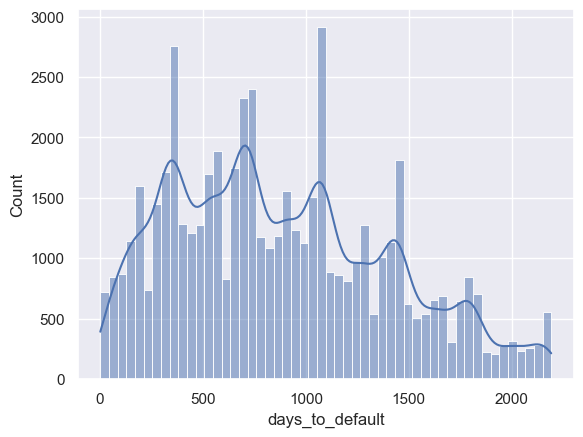

In [45]:
sns.histplot(df['days_to_default'], kde=True)

In [47]:
df[df['days_to_default']>600]

,id,stmt_date,HQ_city,legal_struct,ateco_sector,def_date,fs_year,asst_intang_fixed,asst_tang_fixed,asst_fixed_fin,...,taxes,profit,days_rec,ebitda,roa,roe,wc_net,margin_fin,cf_operations,days_to_default
4443310,4750048,2007-12-31,4.0,SRL,25.0,2009-08-26,2007,208145.0,606521.0,392701.0,...,104983.0,47141.0,268.99,705414.0,4.19,6.21,749367.0,-448013.0,315757.0,604.0
4443322,50180553,2007-12-31,55.0,SRL,25.0,2009-10-13,2007,0.0,825963.0,39478.0,...,1237967.0,1229689.0,NaN,1485910.0,33.54,41.22,2117875.0,2117748.0,1355651.0,652.0
4443327,52870524,2007-12-31,52.0,SRL,10.0,2009-10-09,2007,19255.0,1587838.0,3906.0,...,9962.0,140.0,NaN,178986.0,3.02,0.12,1594679.0,-1490679.0,40163.0,648.0
4443332,60200565,2007-12-31,56.0,SRL,23.0,2009-11-19,2007,1127687.0,5566418.0,122059.0,...,-641170.0,-703852.0,NaN,842818.0,-0.83,-84.40,2935258.0,-5982261.0,275987.0,689.0
4443337,68550391,2007-12-31,39.0,SRL,47.0,2009-09-10,2007,673664.0,193906.0,606.0,...,-29769.0,-40958.0,NaN,229148.0,2.86,-4.08,1399422.0,135675.0,65177.0,619.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823590,95086570249,2010-12-31,24.0,SRL,70.0,2013-12-18,2010,7935.0,0.0,1233665.0,...,61025.0,43063.0,NaN,-20147.0,-0.53,0.97,3535464.0,3213347.0,48191.0,1083.0
4823598,96026470060,2009-12-31,6.0,SPA,38.0,2013-01-14,2009,26377.0,6213759.0,93575.0,...,-1282677.0,-1584758.0,-137.11,660337.0,-5.49,-45.18,2790683.0,-2825801.0,131627.0,1110.0
4823599,96026470060,2008-12-31,6.0,SPA,38.0,2013-01-14,2008,36937.0,7186542.0,117778.0,...,-3723395.0,-3926309.0,-158.64,-1528511.0,-19.93,NaN,-34074.0,-6248581.0,-2315426.0,1475.0
4823600,96026470060,2010-12-31,6.0,SPA,38.0,2013-01-14,2010,77856.0,7013917.0,2001.0,...,1037325.0,668491.0,NaN,2118062.0,1.54,16.01,2006298.0,-2917373.0,2315202.0,745.0


In [48]:
df[df['id']==4750048]

,id,stmt_date,HQ_city,legal_struct,ateco_sector,def_date,fs_year,asst_intang_fixed,asst_tang_fixed,asst_fixed_fin,...,taxes,profit,days_rec,ebitda,roa,roe,wc_net,margin_fin,cf_operations,days_to_default
4443310,4750048,2007-12-31,4.0,SRL,25.0,2009-08-26,2007,208145.0,606521.0,392701.0,...,104983.0,47141.0,268.99,705414.0,4.19,6.21,749367.0,-448013.0,315757.0,604.0
4443311,4750048,2008-12-31,4.0,SRL,25.0,2009-08-26,2008,178565.0,472403.0,382546.0,...,-6252311.0,-6146719.0,-52.51,-1780616.0,-138.24,NaN,-4743872.0,NaN,-2084754.0,238.0


In [52]:
df.groupby('id')['def_date'].nunique().mean()

np.float64(0.08259609357581264)

In [65]:
# df[df['id']==2042140042]

In [69]:
df['label'] = (df['days_to_default']<=365).astype(int)

In [78]:
df.head(3).T

,17,18,19
id,520288,520288,520288
stmt_date,2011-12-31 00:00:00,2008-12-31 00:00:00,2009-12-31 00:00:00
HQ_city,28.0,28.0,28.0
legal_struct,SRL,SRL,SRL
ateco_sector,14.0,14.0,14.0
def_date,NaT,NaT,NaT
fs_year,2011,2008,2009
asst_intang_fixed,67537.0,256438.0,194046.0
asst_tang_fixed,1137566.0,1181416.0,1152014.0
asst_fixed_fin,1908.0,860.0,860.0
